In [1]:
import mahotas as mh
import scipy.ndimage as nd
import numpy as np
import skimage as sk
from skimage import morphology as mo
from matplotlib import pyplot as plt

In [2]:
def branchedPoints(skel):
    branch1=np.array([[2, 1, 2],
                      [1, 1, 1],
                      [2, 2, 2]])
    
    branch2=np.array([[1, 2, 1],
                      [2, 1, 2],
                      [1, 2, 1]])
    
    branch3=np.array([[1, 2, 1], 
                      [2, 1, 2],
                      [1, 2, 2]])
    
    branch4=np.array([[2, 1, 2],
                      [1, 1, 2],
                      [2, 1, 2]])
    
    branch5=np.array([[1, 2, 2], 
                      [2, 1, 2],
                      [1, 2, 1]])
    
    branch6=np.array([[2, 2, 2],
                      [1, 1, 1],
                      [2, 1, 2]])
    
    branch7=np.array([[2, 2, 1],
                      [2, 1, 2],
                      [1, 2, 1]])
    
    branch8=np.array([[2, 1, 2],
                      [2, 1, 1], 
                      [2, 1, 2]])
    
    branch9=np.array([[1, 2, 1],
                      [2, 1, 2],
                      [2, 2, 1]])
    
    br1=mh.morph.hitmiss(skel,branch1)
    br2=mh.morph.hitmiss(skel,branch2)
    br3=mh.morph.hitmiss(skel,branch3)
    br4=mh.morph.hitmiss(skel,branch4)
    br5=mh.morph.hitmiss(skel,branch5)
    br6=mh.morph.hitmiss(skel,branch6)
    br7=mh.morph.hitmiss(skel,branch7)
    br8=mh.morph.hitmiss(skel,branch8)
    br9=mh.morph.hitmiss(skel,branch9)
    return br1+br2+br3+br4+br5+br6+br7+br8+br9

def endPoints(skel):
    endpoint1=np.array([[0, 0, 0],
                        [0, 1, 0],
                        [2, 1, 2]])
    
    endpoint2=np.array([[0, 0, 0],
                        [0, 1, 2],
                        [0, 2, 1]])
    
    endpoint3=np.array([[0, 0, 2],
                        [0, 1, 1],
                        [0, 0, 2]])
    
    endpoint4=np.array([[0, 2, 1],
                        [0, 1, 2],
                        [0, 0, 0]])
    
    endpoint5=np.array([[2, 1, 2],
                        [0, 1, 0],
                        [0, 0, 0]])
    
    endpoint6=np.array([[1, 2, 0],
                        [2, 1, 0],
                        [0, 0, 0]])
    
    endpoint7=np.array([[2, 0, 0],
                        [1, 1, 0],
                        [2, 0, 0]])
    
    endpoint8=np.array([[0, 0, 0],
                        [2, 1, 0],
                        [1, 2, 0]])
    
    ep1=mh.morph.hitmiss(skel,endpoint1)
    ep2=mh.morph.hitmiss(skel,endpoint2)
    ep3=mh.morph.hitmiss(skel,endpoint3)
    ep4=mh.morph.hitmiss(skel,endpoint4)
    ep5=mh.morph.hitmiss(skel,endpoint5)
    ep6=mh.morph.hitmiss(skel,endpoint6)
    ep7=mh.morph.hitmiss(skel,endpoint7)
    ep8=mh.morph.hitmiss(skel,endpoint8)
    ep = ep1+ep2+ep3+ep4+ep5+ep6+ep7+ep8
    return ep

def pruning(skeleton, size):
    '''remove iteratively end points "size" 
       times from the skeleton
    '''
    for i in range(0, size):
        endpoints = endPoints(skeleton)
        endpoints = np.logical_not(endpoints)
        skeleton = np.logical_and(skeleton,endpoints)
    return skeleton

In [3]:
%pwd
%matplotlib inline
im = nd.imread('../missing_part_contour.png')
im = im[:,:,0]
print(type(im), im.shape)

<class 'numpy.ndarray'> (362, 353)


<class 'numpy.ndarray'> (362, 353)


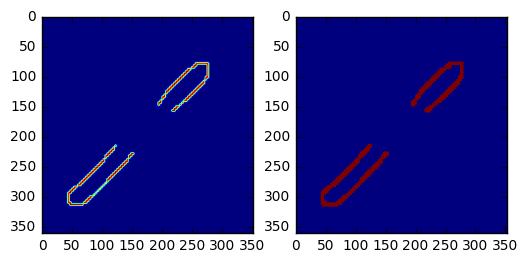

In [4]:
shapeb = im > 0
print(type(shapeb), shapeb.shape)

plt.subplot(121)
plt.imshow(im)

plt.subplot(122)
plt.imshow(shapeb)

In [5]:
skel2 = mo.medial_axis(shapeb)
skel1 = mh.thin(shapeb)

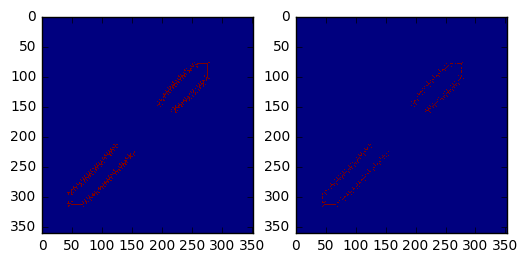

In [6]:
plt.subplot(121)
plt.imshow(skel1,  interpolation='nearest')
plt.subplot(122)
plt.imshow(skel2,  interpolation='nearest')

In [17]:
pruned3 = pruning(skel1,30)

bp = branchedPoints(pruned3)

ep = endPoints(pruned3)
big = mo.binary_dilation(ep, selem = mo.disk(8))
print(np.where(ep > 0))

display = mh.overlay(pruned3, red= big, green=ep>0)

cvx_h = mo.convex_hull_image(ep)

(array([132, 147, 230, 241, 241]), array([203, 231, 112, 139, 140]))


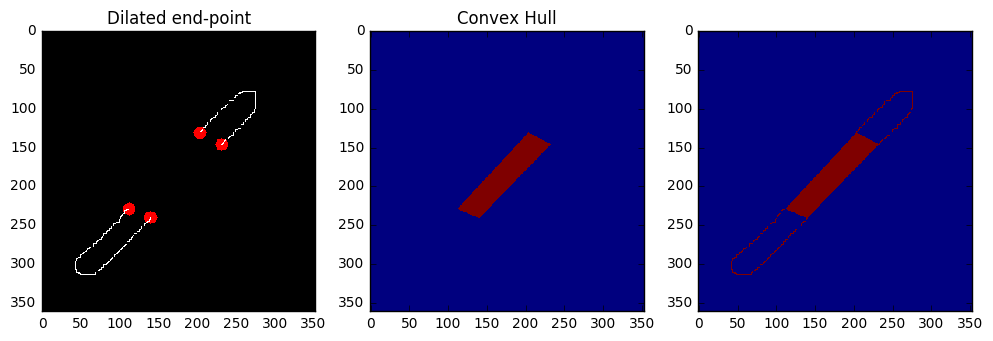

In [24]:
plt.figure(figsize = (12,8))
plt.subplot(131)
plt.title('Dilated end-point')
plt.imshow(display,interpolation = 'nearest')

plt.subplot(132)
plt.title('Convex Hull')
plt.imshow(cvx_h,interpolation = 'nearest')

plt.subplot(133)
plt.imshow(pruned3 + cvx_h,interpolation = 'nearest')

In [18]:
cvx_h = mo.convex_hull_image(ep)